In [1]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# from interp_prep import *
from FT import *

In [2]:
path = r"/cxnfs/Mark/Data/cleaned_data/"
interp_dict_pm10 = {n: pd.read_csv(path+'pm10_interpolated/pm10_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm25 = {n: pd.read_csv(path+'pm25_interpolated/pm25_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm1 = {n: pd.read_csv(path+'pm1_interpolated/pm1_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}

In [3]:
pm10_subset = interp_dict_pm10[17]
pm25_subset = interp_dict_pm25[17]
pm1_subset = interp_dict_pm1[17]
pm10_prepandemic = pm10_subset[:'2020-03-09']
pm25_prepandemic = pm25_subset[:'2020-03-09']
pm1_prepandemic = pm1_subset[:'2020-03-09']
pm10_ecq = pm10_subset['2020-03-17':]
pm25_ecq = pm25_subset['2020-03-17':]
pm1_ecq = pm1_subset['2020-03-17':]

In [4]:
pm10_freq_dom = normed_FT(pm10_subset)
pm25_freq_dom = normed_FT(pm25_subset)
pm1_freq_dom = normed_FT(pm1_subset)

In [5]:
pm10_prepandemic_spec = normed_FT(pm10_prepandemic)
pm25_prepandemic_spec = normed_FT(pm25_prepandemic) 
pm1_prepandemic_spec = normed_FT(pm1_prepandemic) 
pm10_ecq_spec = normed_FT(pm10_ecq) 
pm25_ecq_spec =  normed_FT(pm25_ecq) 
pm1_ecq_spec = normed_FT(pm1_ecq)

## PM1 pre-ECQ

In [51]:
pm1_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n38 & 0.000694 & 0.265289 & 1.000000 \\\\\n76 & 0.001389 & 0.038481 & 0.500000 \\\\\n1 & 0.000018 & 0.029668 & 38.000000 \\\\\n3 & 0.000055 & 0.029503 & 12.666667 \\\\\n35 & 0.000640 & 0.025937 & 1.085714 \\\\\n12 & 0.000219 & 0.021649 & 3.166667 \\\\\n5 & 0.000091 & 0.019994 & 7.600000 \\\\\n11 & 0.000201 & 0.019162 & 3.454545 \\\\\n41 & 0.000749 & 0.019127 & 0.926829 \\\\\n4 & 0.000073 & 0.018912 & 9.500000 \\\\\n34 & 0.000621 & 0.018879 & 1.117647 \\\\\n42 & 0.000768 & 0.018827 & 0.904762 \\\\\n8 & 0.000146 & 0.018355 & 4.750000 \\\\\n114 & 0.002083 & 0.013297 & 0.333333 \\\\\n19 & 0.000347 & 0.011937 & 2.000000 \\\\\n49 & 0.000895 & 0.010708 & 0.775510 \\\\\n23 & 0.000420 & 0.010375 & 1.652174 \\\\\n24 & 0.000439 & 0.009964 & 1.583333 \\\\\n36 & 0.000658 & 0.009573 & 1.055556 \\\\\n14 & 0.000256 & 0.008707 & 2.714286 \\\\\n152 & 0.002778 & 0.008557 & 0.250000 \\\\\n13 & 0.000238 & 0.008463 & 2.92307

In [30]:
pm1_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30)

,freq,abs_fourier_coeff_square,period (in days)
38,0.000694,0.265289,1.000000
76,0.001389,0.038481,0.500000
1,0.000018,0.029668,38.000000
3,0.000055,0.029503,12.666667
35,0.000640,0.025937,1.085714
12,0.000219,0.021649,3.166667
5,0.000091,0.019994,7.600000
11,0.000201,0.019162,3.454545
41,0.000749,0.019127,0.926829
4,0.000073,0.018912,9.500000


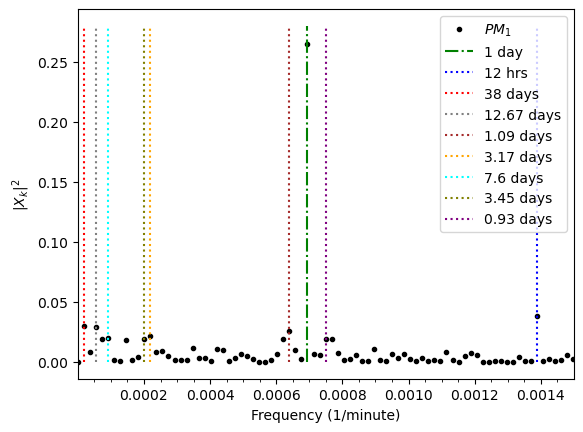

In [42]:
fig, ax = plt.subplots()
ax.plot(pm1_prepandemic_spec.freq, pm1_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$')
ax.set_xlim(0.0000001, 0.0015)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(1*24*60), 0, 0.28, linestyle = 'dashdot', label = '1 day', color = 'green')
ax.vlines(1/(0.5*24*60), 0, 0.28, linestyle = 'dotted', label = '12 hrs', color = 'blue')
ax.vlines(1/(38*24*60), 0, 0.28, linestyle = 'dotted', label = '38 days', color = 'red')
ax.vlines(1/(12.666667*24*60), 0, 0.28, linestyle = 'dotted', label = '12.67 days', color = 'gray')
ax.vlines(1/(1.085714*24*60), 0, 0.28, linestyle = 'dotted', label = '1.09 days', color = 'brown')
ax.vlines(1/(3.166667*24*60), 0, 0.28, linestyle = 'dotted', label = '3.17 days', color = 'orange')
ax.vlines(1/(7.600000*24*60), 0, 0.28, linestyle = 'dotted', label = '7.6 days', color = 'cyan')
ax.vlines(1/(3.454545*24*60), 0, 0.28, linestyle = 'dotted', label = '3.45 days', color = 'olive')
ax.vlines(1/(0.926829*24*60), 0, 0.28, linestyle = 'dotted', label = '0.93 days', color = 'purple')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()

## PM2.5 pre-ECQ

In [53]:
pm25_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n38 & 0.000694 & 0.253633 & 1.000000 \\\\\n76 & 0.001389 & 0.034965 & 0.500000 \\\\\n3 & 0.000055 & 0.030163 & 12.666667 \\\\\n35 & 0.000640 & 0.024861 & 1.085714 \\\\\n5 & 0.000091 & 0.023046 & 7.600000 \\\\\n1 & 0.000018 & 0.021316 & 38.000000 \\\\\n8 & 0.000146 & 0.019836 & 4.750000 \\\\\n41 & 0.000749 & 0.019443 & 0.926829 \\\\\n11 & 0.000201 & 0.019411 & 3.454545 \\\\\n12 & 0.000219 & 0.019213 & 3.166667 \\\\\n4 & 0.000073 & 0.018429 & 9.500000 \\\\\n34 & 0.000621 & 0.018406 & 1.117647 \\\\\n42 & 0.000768 & 0.017889 & 0.904762 \\\\\n114 & 0.002083 & 0.012166 & 0.333333 \\\\\n19 & 0.000347 & 0.011305 & 2.000000 \\\\\n49 & 0.000895 & 0.010553 & 0.775510 \\\\\n36 & 0.000658 & 0.010235 & 1.055556 \\\\\n23 & 0.000420 & 0.009756 & 1.652174 \\\\\n14 & 0.000256 & 0.009247 & 2.714286 \\\\\n2 & 0.000037 & 0.009137 & 19.000000 \\\\\n13 & 0.000238 & 0.008899 & 2.923077 \\\\\n24 & 0.000439 & 0.008786 & 1.583333

In [50]:
pm25_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30)

,freq,abs_fourier_coeff_square,period (in days)
38,0.000694,0.253633,1.000000
76,0.001389,0.034965,0.500000
3,0.000055,0.030163,12.666667
35,0.000640,0.024861,1.085714
5,0.000091,0.023046,7.600000
1,0.000018,0.021316,38.000000
8,0.000146,0.019836,4.750000
41,0.000749,0.019443,0.926829
11,0.000201,0.019411,3.454545
12,0.000219,0.019213,3.166667


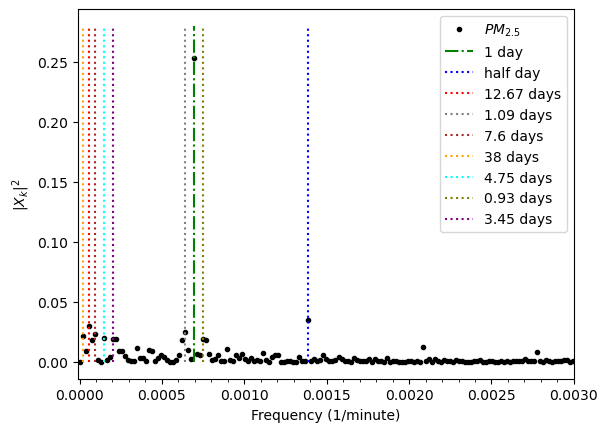

In [63]:
fig, ax = plt.subplots()
ax.plot(pm25_prepandemic_spec.freq, pm25_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$')
ax.set_xlim(-0.00001, 0.003)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(1*24*60), 0, 0.28, linestyle = 'dashdot', label = '1 day', color = 'green')
ax.vlines(1/(0.5*24*60), 0, 0.28, linestyle = 'dotted', label = 'half day', color = 'blue')
ax.vlines(1/(12.67*24*60), 0, 0.28, linestyle = 'dotted', label = '12.67 days', color = 'red')
ax.vlines(1/(1.09*24*60), 0, 0.28, linestyle = 'dotted', label = '1.09 days', color = 'gray')
ax.vlines(1/(7.6*24*60), 0, 0.28, linestyle = 'dotted', label = '7.6 days', color = 'brown')
ax.vlines(1/(38*24*60), 0, 0.28, linestyle = 'dotted', label = '38 days', color = 'orange')
ax.vlines(1/(4.75*24*60), 0, 0.28, linestyle = 'dotted', label = '4.75 days', color = 'cyan')
ax.vlines(1/(0.93*24*60), 0, 0.28, linestyle = 'dotted', label = '0.93 days', color = 'olive')
ax.vlines(1/(3.45*24*60), 0, 0.28, linestyle = 'dotted', label = '3.45 days', color = 'purple')

# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()

## PM10 pre-ECQ

In [55]:
pm10_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n38 & 0.000694 & 0.159228 & 1.000000 \\\\\n5 & 0.000091 & 0.030940 & 7.600000 \\\\\n3 & 0.000055 & 0.023352 & 12.666667 \\\\\n35 & 0.000640 & 0.021104 & 1.085714 \\\\\n76 & 0.001389 & 0.020306 & 0.500000 \\\\\n11 & 0.000201 & 0.018649 & 3.454545 \\\\\n41 & 0.000749 & 0.017663 & 0.926829 \\\\\n8 & 0.000146 & 0.016770 & 4.750000 \\\\\n34 & 0.000621 & 0.015624 & 1.117647 \\\\\n42 & 0.000768 & 0.015326 & 0.904762 \\\\\n4 & 0.000073 & 0.015066 & 9.500000 \\\\\n12 & 0.000219 & 0.012745 & 3.166667 \\\\\n36 & 0.000658 & 0.010287 & 1.055556 \\\\\n114 & 0.002083 & 0.009335 & 0.333333 \\\\\n14 & 0.000256 & 0.009094 & 2.714286 \\\\\n49 & 0.000895 & 0.009038 & 0.775510 \\\\\n19 & 0.000347 & 0.008748 & 2.000000 \\\\\n13 & 0.000238 & 0.008676 & 2.923077 \\\\\n2 & 0.000037 & 0.007944 & 19.000000 \\\\\n1 & 0.000018 & 0.007799 & 38.000000 \\\\\n61 & 0.001115 & 0.006747 & 0.622951 \\\\\n24 & 0.000439 & 0.006578 & 1.583333

In [54]:
pm10_prepandemic_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30)

,freq,abs_fourier_coeff_square,period (in days)
38,0.000694,0.159228,1.000000
5,0.000091,0.030940,7.600000
3,0.000055,0.023352,12.666667
35,0.000640,0.021104,1.085714
76,0.001389,0.020306,0.500000
11,0.000201,0.018649,3.454545
41,0.000749,0.017663,0.926829
8,0.000146,0.016770,4.750000
34,0.000621,0.015624,1.117647
42,0.000768,0.015326,0.904762


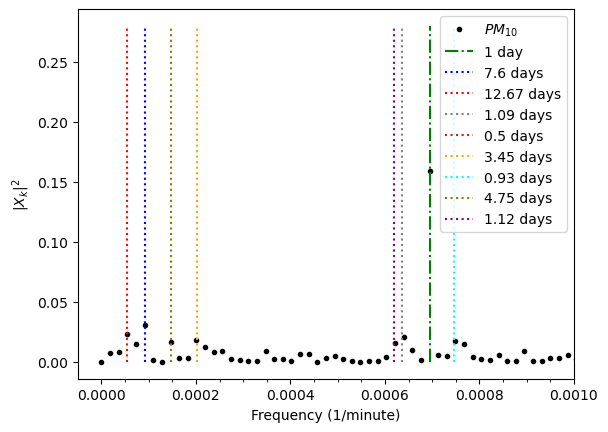

In [64]:
fig, ax = plt.subplots()
ax.plot(pm10_prepandemic_spec.freq, pm10_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$')
ax.set_xlim(-0.00005, 0.001)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(1*24*60), 0, 0.28, linestyle = 'dashdot', label = '1 day', color = 'green')
ax.vlines(1/(7.6*24*60), 0, 0.28, linestyle = 'dotted', label = '7.6 days', color = 'blue')
ax.vlines(1/(12.67*24*60), 0, 0.28, linestyle = 'dotted', label = '12.67 days', color = 'red')
ax.vlines(1/(1.09*24*60), 0, 0.28, linestyle = 'dotted', label = '1.09 days', color = 'gray')
ax.vlines(1/(0.5*24*60), 0, 0.28, linestyle = 'dotted', label = '0.5 days', color = 'brown')
ax.vlines(1/(3.45*24*60), 0, 0.28, linestyle = 'dotted', label = '3.45 days', color = 'orange')
ax.vlines(1/(0.93*24*60), 0, 0.28, linestyle = 'dotted', label = '0.93 days', color = 'cyan')
ax.vlines(1/(4.75*24*60), 0, 0.28, linestyle = 'dotted', label = '4.75 days', color = 'olive')
ax.vlines(1/(1.12*24*60), 0, 0.28, linestyle = 'dotted', label = '1.12 days', color = 'purple')







# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()

## PM1 ECQ

In [56]:
pm1_ecq_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n2 & 0.000023 & 0.133157 & 29.833333 \\\\\n60 & 0.000698 & 0.067925 & 0.994444 \\\\\n15 & 0.000175 & 0.038225 & 3.977778 \\\\\n20 & 0.000233 & 0.029627 & 2.983333 \\\\\n179 & 0.002083 & 0.024678 & 0.333333 \\\\\n7 & 0.000081 & 0.020720 & 8.523810 \\\\\n17 & 0.000198 & 0.018837 & 3.509804 \\\\\n119 & 0.001385 & 0.018392 & 0.501401 \\\\\n61 & 0.000710 & 0.014495 & 0.978142 \\\\\n9 & 0.000105 & 0.014281 & 6.629630 \\\\\n8 & 0.000093 & 0.014002 & 7.458333 \\\\\n4 & 0.000047 & 0.013674 & 14.916667 \\\\\n46 & 0.000535 & 0.013100 & 1.297101 \\\\\n3 & 0.000035 & 0.012737 & 19.888889 \\\\\n19 & 0.000221 & 0.011212 & 3.140351 \\\\\n50 & 0.000582 & 0.010828 & 1.193333 \\\\\n64 & 0.000745 & 0.010358 & 0.932292 \\\\\n59 & 0.000687 & 0.009784 & 1.011299 \\\\\n16 & 0.000186 & 0.009179 & 3.729167 \\\\\n28 & 0.000326 & 0.009093 & 2.130952 \\\\\n38 & 0.000442 & 0.008262 & 1.570175 \\\\\n239 & 0.002782 & 0.008206 & 0.2496

In [57]:
pm1_ecq_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30)

,freq,abs_fourier_coeff_square,period (in days)
2,0.000023,0.133157,29.833333
60,0.000698,0.067925,0.994444
15,0.000175,0.038225,3.977778
20,0.000233,0.029627,2.983333
179,0.002083,0.024678,0.333333
7,0.000081,0.020720,8.523810
17,0.000198,0.018837,3.509804
119,0.001385,0.018392,0.501401
61,0.000710,0.014495,0.978142
9,0.000105,0.014281,6.629630


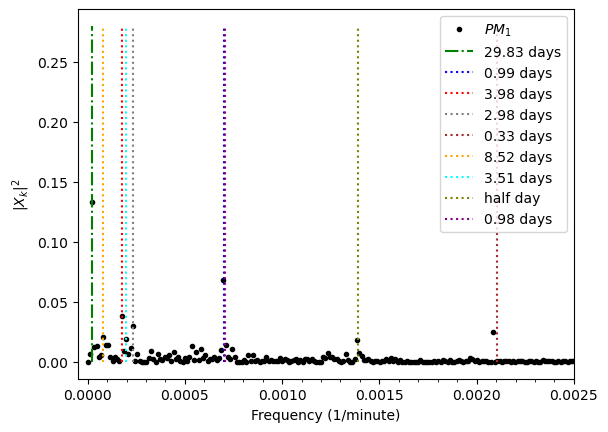

In [77]:
fig, ax = plt.subplots()
ax.plot(pm1_ecq_spec.freq, pm1_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$')
ax.set_xlim(-0.00005, 0.0025)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(29.83*24*60), 0, 0.28, linestyle = 'dashdot', label = '29.83 days', color = 'green')
ax.vlines(1/(0.99*24*60), 0, 0.28, linestyle = 'dotted', label = '0.99 days', color = 'blue')
ax.vlines(1/(3.98*24*60), 0, 0.28, linestyle = 'dotted', label = '3.98 days', color = 'red')
ax.vlines(1/(2.98*24*60), 0, 0.28, linestyle = 'dotted', label = '2.98 days', color = 'gray')
ax.vlines(1/(0.33*24*60), 0, 0.28, linestyle = 'dotted', label = '0.33 days', color = 'brown')
ax.vlines(1/(8.52*24*60), 0, 0.28, linestyle = 'dotted', label = '8.52 days', color = 'orange')
ax.vlines(1/(3.51*24*60), 0, 0.28, linestyle = 'dotted', label = '3.51 days', color = 'cyan')
ax.vlines(1/(0.50*24*60), 0, 0.28, linestyle = 'dotted', label = 'half day', color = 'olive')
ax.vlines(1/(0.98*24*60), 0, 0.28, linestyle = 'dotted', label = '0.98 days', color = 'purple')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()

## PM2.5 ECQ

In [58]:
pm25_ecq_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n2 & 0.000023 & 0.110404 & 29.833333 \\\\\n60 & 0.000698 & 0.063404 & 0.994444 \\\\\n15 & 0.000175 & 0.034722 & 3.977778 \\\\\n20 & 0.000233 & 0.026590 & 2.983333 \\\\\n179 & 0.002083 & 0.022600 & 0.333333 \\\\\n7 & 0.000081 & 0.022332 & 8.523810 \\\\\n119 & 0.001385 & 0.017245 & 0.501401 \\\\\n17 & 0.000198 & 0.015231 & 3.509804 \\\\\n9 & 0.000105 & 0.015135 & 6.629630 \\\\\n61 & 0.000710 & 0.014411 & 0.978142 \\\\\n8 & 0.000093 & 0.012798 & 7.458333 \\\\\n46 & 0.000535 & 0.011505 & 1.297101 \\\\\n50 & 0.000582 & 0.011137 & 1.193333 \\\\\n4 & 0.000047 & 0.010995 & 14.916667 \\\\\n3 & 0.000035 & 0.010318 & 19.888889 \\\\\n19 & 0.000221 & 0.010005 & 3.140351 \\\\\n64 & 0.000745 & 0.009118 & 0.932292 \\\\\n38 & 0.000442 & 0.008158 & 1.570175 \\\\\n28 & 0.000326 & 0.008025 & 2.130952 \\\\\n239 & 0.002782 & 0.007696 & 0.249651 \\\\\n59 & 0.000687 & 0.007608 & 1.011299 \\\\\n48 & 0.000559 & 0.007406 & 1.2430

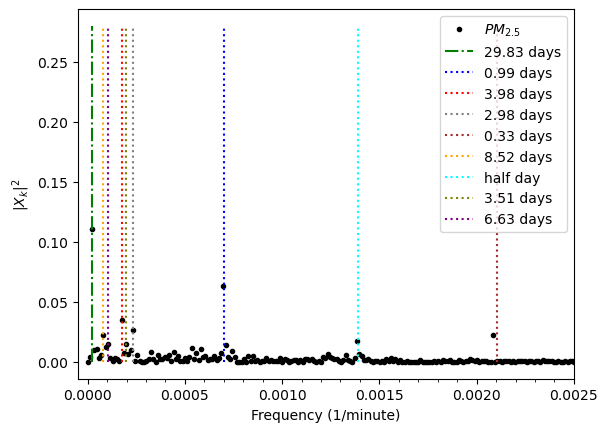

In [76]:
fig, ax = plt.subplots()
ax.plot(pm25_ecq_spec.freq, pm25_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$')
ax.set_xlim(-0.00005, 0.0025)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(29.83*24*60), 0, 0.28, linestyle = 'dashdot', label = '29.83 days', color = 'green')
ax.vlines(1/(0.99*24*60), 0, 0.28, linestyle = 'dotted', label = '0.99 days', color = 'blue')
ax.vlines(1/(3.98*24*60), 0, 0.28, linestyle = 'dotted', label = '3.98 days', color = 'red')
ax.vlines(1/(2.98*24*60), 0, 0.28, linestyle = 'dotted', label = '2.98 days', color = 'gray')
ax.vlines(1/(0.33*24*60), 0, 0.28, linestyle = 'dotted', label = '0.33 days', color = 'brown')
ax.vlines(1/(8.52*24*60), 0, 0.28, linestyle = 'dotted', label = '8.52 days', color = 'orange')
ax.vlines(1/(0.50*24*60), 0, 0.28, linestyle = 'dotted', label = 'half day', color = 'cyan')
ax.vlines(1/(3.51*24*60), 0, 0.28, linestyle = 'dotted', label = '3.51 days', color = 'olive')
ax.vlines(1/(6.63*24*60), 0, 0.28, linestyle = 'dotted', label = '6.63 days', color = 'purple')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()

## PM10 ECQ

In [59]:
pm10_ecq_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).style.to_latex()

'\\begin{tabular}{lrrr}\n & freq & abs_fourier_coeff_square & period (in days) \\\\\n2 & 0.000023 & 0.071919 & 29.833333 \\\\\n60 & 0.000698 & 0.035892 & 0.994444 \\\\\n15 & 0.000175 & 0.023388 & 3.977778 \\\\\n7 & 0.000081 & 0.019879 & 8.523810 \\\\\n20 & 0.000233 & 0.016900 & 2.983333 \\\\\n9 & 0.000105 & 0.013908 & 6.629630 \\\\\n179 & 0.002083 & 0.013403 & 0.333333 \\\\\n119 & 0.001385 & 0.011454 & 0.501401 \\\\\n61 & 0.000710 & 0.010860 & 0.978142 \\\\\n50 & 0.000582 & 0.007899 & 1.193333 \\\\\n3 & 0.000035 & 0.007647 & 19.888889 \\\\\n17 & 0.000198 & 0.006865 & 3.509804 \\\\\n46 & 0.000535 & 0.006608 & 1.297101 \\\\\n8 & 0.000093 & 0.006594 & 7.458333 \\\\\n19 & 0.000221 & 0.006499 & 3.140351 \\\\\n38 & 0.000442 & 0.006167 & 1.570175 \\\\\n239 & 0.002782 & 0.005943 & 0.249651 \\\\\n4 & 0.000047 & 0.005755 & 14.916667 \\\\\n106 & 0.001234 & 0.005432 & 0.562893 \\\\\n64 & 0.000745 & 0.005341 & 0.932292 \\\\\n48 & 0.000559 & 0.005123 & 1.243056 \\\\\n28 & 0.000326 & 0.004500 & 2.130

In [71]:
pm10_ecq_spec.sort_values(by = 'abs_fourier_coeff_square', ascending = False).head(30).freq.max()

0.002781657355679702

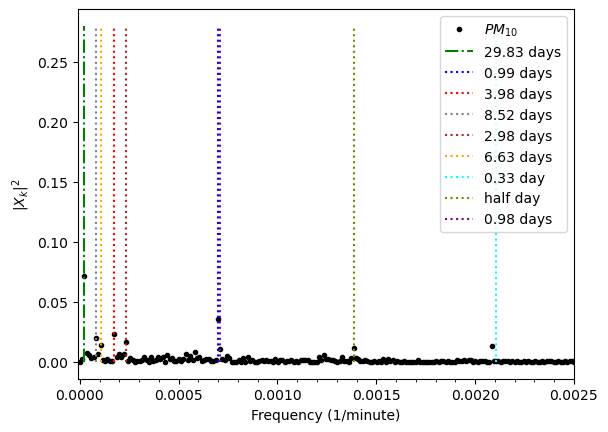

In [75]:
fig, ax = plt.subplots()
ax.plot(pm10_ecq_spec.freq, pm10_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$')
ax.set_xlim(-0.00001, 0.0025)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
ax.vlines(1/(29.83*24*60), 0, 0.28, linestyle = 'dashdot', label = '29.83 days', color = 'green')
ax.vlines(1/(0.99*24*60), 0, 0.28, linestyle = 'dotted', label = '0.99 days', color = 'blue')
ax.vlines(1/(3.98*24*60), 0, 0.28, linestyle = 'dotted', label = '3.98 days', color = 'red')
ax.vlines(1/(8.52*24*60), 0, 0.28, linestyle = 'dotted', label = '8.52 days', color = 'gray')
ax.vlines(1/(2.98*24*60), 0, 0.28, linestyle = 'dotted', label = '2.98 days', color = 'brown')
ax.vlines(1/(6.63*24*60), 0, 0.28, linestyle = 'dotted', label = '6.63 days', color = 'orange')
ax.vlines(1/(0.33*24*60), 0, 0.28, linestyle = 'dotted', label = '0.33 day', color = 'cyan')
ax.vlines(1/(0.5*24*60), 0, 0.28, linestyle = 'dotted', label = 'half day', color = 'olive')
ax.vlines(1/(0.98*24*60), 0, 0.28, linestyle = 'dotted', label = '0.98 days', color = 'purple')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()